In [6]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Загружаем датасет

In [150]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

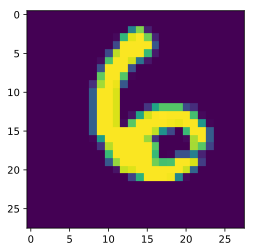

In [158]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][5].reshape(28,28))

# Обучаем модель

In [159]:
# создадим функцию для расчета ошибки
def logloss_modified(x, y, w, glob_param=0):
    ones = np.ones(x.shape[0])
    arr = np.log(ones+np.exp(-y*(x.dot(w))))
    err = np.average(arr)
    err += glob_param*((w**2).sum())**0.5
    return err

In [160]:
# создадим функцию для оценки вероятности того, что это 6
def prob(x, w):
    return 1/(1+np.exp(-x.dot(w)))

In [168]:
X_raw = train['data'][:]
y_raw = train['labels'][:]
X_mean = np.mean(X_raw, axis=0)
X_std = (np.var(X_raw, axis=0)+np.full(X_raw[0].size, 0.0001))**0.5
X_train0, X_test0, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.23, random_state=42)
X_train = np.zeros(X_train0.shape)
X_test = np.zeros(X_test0.shape)

for i in range(X_train.shape[0]):
    X_train[i] = (X_train[i] - X_mean)
for i in range(X_test.shape[0]):
    X_test[i] = (X_test[i] - X_mean)


In [169]:
# стохастический градиентный спуск (поэтому 10k итераций, а не 100)
#with open('w1.pickle', 'rb') as f:
#     w = pickle.load(f)
w = np.zeros(X_raw.shape[1])
step = 1.1e-5
global_param = 9
X = X_train
y = y_train - np.full(y_train.shape[0], 5.5)
y *=2
y_t = y_test - np.full(y_test.shape[0], 5.5)
y_t *= 2
y_train -= np.full(y_train.shape[0], 5.)
y_test -= np.full(y_test.shape[0], 5.)
tr_eval_loss = []
tr_eval_acc = []
te_eval_loss = []
te_eval_acc = []
iter_n = 0
for iter in tqdm.tqdm_notebook(range(1000)):
    grad = 0
    iter_n += 1
    j = np.random.randint(0, X[0].shape[0])
    for i in range(X.shape[0]):
        grad += - y[i] * X[i][j] / ( 1. + np.exp( y[i] * np.dot(w.T, X[i]) ) ) + global_param * w[j]
    w[j] = w[j] - step * grad
    tr_eval_loss.append(logloss_modified(X, y, w))
    te_eval_loss.append(logloss_modified(X_test, y_t, w))
    tr_eval_acc.append(1-np.average(np.round(np.abs(y_train-prob(X_train, w)))))
    te_eval_acc.append(1-np.average(np.round(np.abs(y_test-prob(X_test, w)))))

tr_eval = np.array([tr_eval_loss, tr_eval_acc])
te_eval = np.array([te_eval_loss, te_eval_acc])

/home/vladimir/.virtualenvs/technotrack/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/vladimir/.virtualenvs/technotrack/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/home/vladimir/.virtualenvs/technotrack/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


1.0


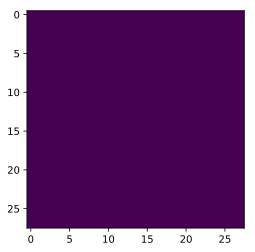

In [171]:
# небольшой тест
plt.imshow((X_test[9]+X_mean).reshape(28,28))
print(prob(X_test,w)[9])
with open('w1.pickle', 'wb') as f:
     pickle.dump(w, f)

# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

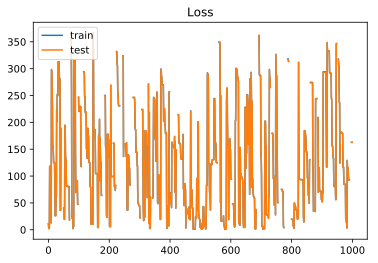

In [172]:
plt.title('Loss')
plt.plot(tr_eval[0], label='train')
plt.plot(te_eval[0], label='test')
plt.legend()

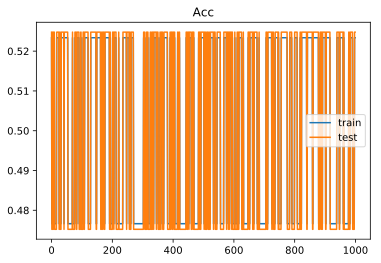

In [173]:
plt.title('Acc')
plt.plot(tr_eval[1], label='train')
plt.plot(te_eval[1], label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [497]:
X = test_no_lables['data']
for i in range(X.shape[0]):
    X[i] = X[i] - X_mean
    X[i] = X[i] / X_std
Y_pred = prob(X, w)

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(X.shape[0]):
        print(i, Y_pred[i], sep=',', file=fout)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Пишите тему письм в формате "[МИФИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем family.ipynb
- Обязательно указывайте ваш ник на kaggle